# Research Notebook
## Adam Smith-Orlik (Junior Mentor)
## Date: Dec. 13-17

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Wrote code to generate halo data for snapshots 102-120 for Halo 49, to be used in the analysis of isolated MW halos 

- Read G.Besla et al. *The highest speed local dark matter particles come from the Large Magellanic Cloud* (Ref [1]) 

- Wrote code to recreate Figure 5 in Ref [1] with halo data from halo 49 snapshots to compare isolated MW halo to MW+LMC system at pericenter

- Attended group meeting for LMC project to discuss results and next steps for the islolated MW analysis

## Motivation:

The Large Megellanic Cloud (LMC) is a satellie galaxy of the Milky Way (MW) whose dark matter (DM) halo overlaps with the MW's at its pericenter approach (closest approach). DM from the LMC is thought to affect the DM distribution in the Solar neighborhood of the MW, holding important consequences for ground based DM detection experiments. 

Last week we presented results to the collaboration that corroborated the result that DM particles originating from the LMC contribute to the high speed tail of the velocity distribuion in the Solar neighborhood. It is also thought (see Ref [1]) that the native MW DM particles receive a boost in thier velocity distribution due to resonances induced by the motion of the LMC at or near pericenter . To test this we use an early snapshot from the simulation suite in absence of any LMC DM particles as a proxy for an isolated MW halo and compare to results at pericenter. 

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Wrote the following code to analyze the isolated MW snapshot data and produce DM velocity distribuion and halo integral tables, along with $\%LMC$, $\Delta\eta$ values, and anisotropy alike for MW DM particles and MW+LMC DM particles. The code is formatted as a Do loop that loops over the simulation data files (snapshots 102-120) and uses built-in functions to calculate important quantities such as those mentioned above, saving them in lists and exporting them to a local drive for further analysis. 


```
newsnaplist = Table[i, {i, 102, 120, 1}];

mwIsolatedData = {};

Do[
 Module[{snap, filename, DataSet, vc, dmcutMat, mwcutMat, sunPos, 
    rowNum, row, deltaAlphaSP, deltaBetaSP, deltaAlphaSM, deltaBetaSM,
     dmsun, mwsun, dmvDet, mwvDet, fvTable, percentlmccone, 
    percentlmcshell, dmBeta, mwBeta, dmHalo, mwHalo, avgHalo, 
    delEta},
   Print[k];
   (* filenames *)
   snap = ToString[k];
   
   filename = 
    particleDataPath <> "particleData_pair_49_snap_" <> snap <> 
     ".hdf5";
   (* build dataset *)
   DataSet = dataSet[filename];
   (* ciruclar velocity*)
   vc = vcSystem[filename];
   (* shell cut *)
   dmcutMat = cut[DataSet, "dm", {6, 10}];
   mwcutMat = cut[DataSet, "mw", {6, 10}];
   (* sun cut and reference change *)
   dmvDet = detectorFrame[dmcutMat, vc];
   mwvDet = detectorFrame[mwcutMat, vc];
   (* avg Tables*)
   dmHalo = fModDetAvg[dmvDet];
   mwHalo = fModDetAvg[mwvDet];
   fvTable = {dmHalo[[1]], dmHalo[[2]], dmHalo[[3]], mwHalo[[1]], 
     mwHalo[[2]], mwHalo[[3]]};
   (* percent LMC *)
   percentlmcshell = 
    N[(((Length[dmcutMat] - Length[mwcutMat])/Length[dmcutMat])*100), 
     2];
   (* anisotropy *)
   dmBeta = anisotropy[dmcutMat];
   mwBeta = anisotropy[mwcutMat];
   (* delta eta *)
   avgHalo = 
    getavgHaloTables[dmHalo[[1]], dmHalo[[2]], dmHalo[[3]], 
     mwHalo[[1]], mwHalo[[2]], mwHalo[[3]]];
   delEta = deltaEtaChiSquared[dmHalo[[1]], mwHalo[[1]]];
   
   Put[fvTable, 
    isoPath <> "tables/fv/" <> snap <> 
     "_default_fv_table_MWISO.txt"];
   Put[avgHalo, 
    isoPath <> "tables/halo/" <> snap <> 
     "_default_halo_table_MWISO.txt"];
   
   AppendTo[
    mwIsolatedData, {k, percentlmcshell, dmBeta, mwBeta, delEta }];
   
   ];
 
 , {k, newsnaplist}]
 
```

The code outputs data tables discussed bellow as well as the following data table of the above-mentioned quantities:

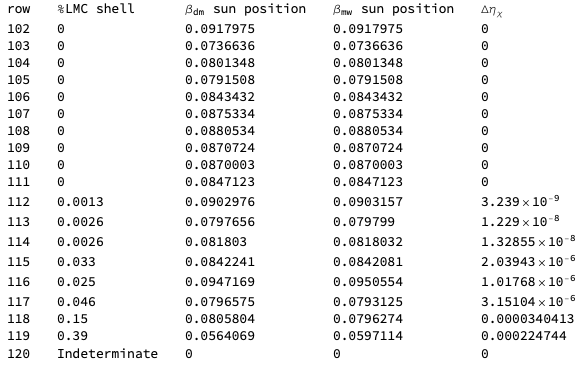

*Figure 1: Table for snapshots 102 to 120 including the total %LMC, anisotropy for MW and MW+LMC DM particles, and $\Delta \eta_{\chi}$, which quantifies the difference in the MW and MW+LMC halo integrals.*  

The claim in Ref [3] is that the high speed tail is is effected by both LMC particles at infall and the resonance caused by the motion of the LMC in its orbit around the MW. The event rate equation, $$ \frac{dR}{dE_R} = \frac{\rho_{\chi}}{m_{\chi}} \frac{1}{m_{A}} \int_{\nu > \nu_{min}} d^{3}\nu \frac{d\sigma_{A}}{dE_{R}} \nu f_{det}({\textbf{v},t}) \;\;\; , $$
where $\rho_{\chi} $ is the local DM density, $m_{\chi}$ the DM mass, $m_{A}$ the mass of the target nuclei, $\frac{d\sigma_{A}}{dE_{R}}$ the energy differntial DM-nucleus scattering cross-section, $f_{det}(\textbf{v}, t)$ the DM velocity distribution in the detector frame, and $\nu_{min}$ the minimum speed required to impart a recoil of energy $E_R$, determines the exclusion limits important for direct detection searches. Given assumptions about the DM model being used we can pull out the integral,  
$$ \eta(\nu_{min},t) \equiv \int_{\nu > \nu_{min}} d^{3}\nu \; \frac{ f_{det}({\textbf{v},t}) }{\nu}\;\;\; ,$$
called the halo integral, which parameterizes the astrophysical input (along with the estimated DM density) in the event rate calculation, and study its behaviour in the simulations. 
The code above generates these halo integrals from simualtion data for the isolated MW halo and the MW+LMC halo at pericenter to see if there are any disernable difference in the tails--which bears important consequences for low mass DM models where $\nu_{min}$ is near the tail. 

The results below were then presented to the collaborators at our weekly meeting and the next steps were discussed and outlined. 

# 3: So what? (What does it mean?)
## Describe your results


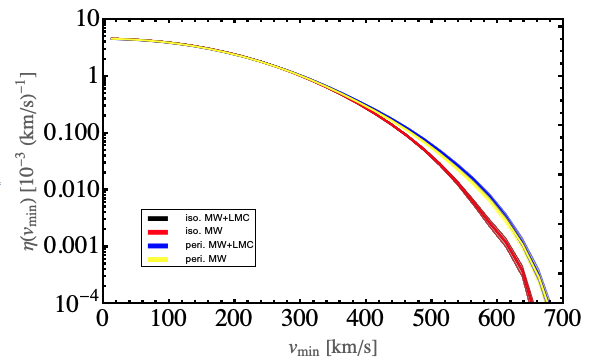
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 
*Figure 2: Halo integral for snapshot 102 (isolated MW) and snapshot 139 (pericenter).*

Figure 2 shows the generated halo integrals for the isolated MW (red), MW at pericenter (yellow), and the MW+LMC at pericenter (blue), which shows clearly that the MW at pericenter tail is boosted to a higher $\nu_{min}$ compared with the isolated MW tail. What's more, MW+LMC at pericenter shows that the LMC DM particles themselves impact the shape of the halo integral directly, confirming the result that the tail is partly of LMC origin. Comparing Figure 2 to Figure 5 in Ref [1] (reprinted here for convenience as Figure 3) we see the same trend exists wherein the MW curve is shifted towards higher $\nu_{min}$ compared to its isolated MW counerpart. 

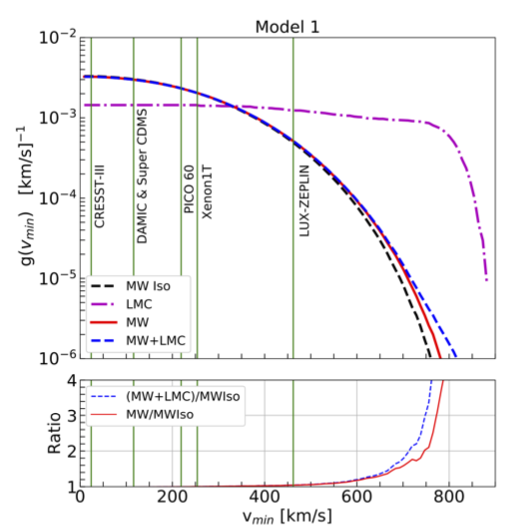
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
*Figure 3: Halo integrals for the isolated MW and MW+LMC G19 simulations used in Ref [1].*

These results are a success, since, what we have shown is that, apart from the LMC DM particles themselves, there is a boost effect in the halo integral due to the presence of the LMC in its orbit of the MW, as we set out to determine.

These results mean that we can now seperate and quantify the impact of the LMC DM particles themeselves from the impact due to the motion of the LMC on the local properties of DM. Previous study of the exclusion limits has shown that the impact of high speed LMC DM in the Solar region leads to a departure in exclusions limits from the currently accepted model in the low mass region as seen in Figure 4. Similar plots with exclusion limits derived from the isolated MW and the MW at pericenter can be generated to see the effect of the LMC motion itself on the native MW DM population. 

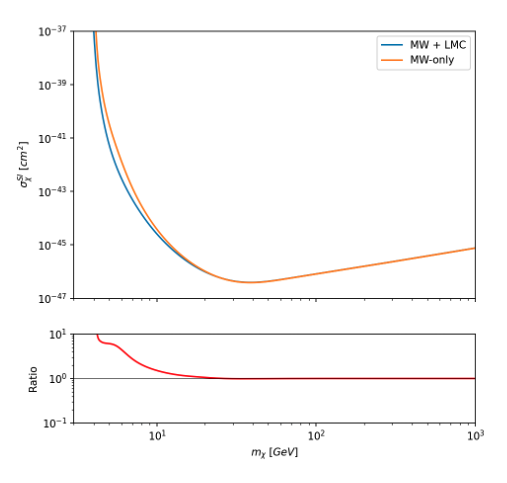
*Figure 4: Exlusion limit example for halo 49 snapshot 133 for Xenon1T spin-independent cross-section. Illustrating the departure in exclusion curves at low DM mass.*

# 4. Now what? (What's next?)
## Plan for the next week

The intended goal of confirming the finding in Ref [3] was achieved. Next week we will use the results--the isolated MW and MW at pericenter halos--to generate mock exclusion limits to determine quantitativley what the impact of the boosted MW population is on the derived limits of direct detection experiments, and to compare this to the impact of the LMC DM particles in the Solar region. 

# 5. Bibliography

[1] G. Besla, A. Peter and N. Garavito-Camargo, *The highest-speed local dark matter particles come from the Large Magellanic Cloud*, JCAP 11, 013 (2019), doi:10.1088/1475-
7516/2019/11/013, 1909.04140.